## Case Study on Pre-processing - Week 10

### 1. Load the given dataset into python environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. Make ‘PassengerId’ as the index column

In [3]:
data.set_index(['PassengerId'],inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 3. Check the basic details of the dataset

In [4]:
# The concise summary of the dataset is:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# To check the number of rows and columns in the dataset
data.shape

(891, 11)

In [6]:
# The column entries in the dataset are:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# The descriptive statistics of the given dataset is:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. Fill in all the missing values present in all the columns in the dataset

In [8]:
# To check for missing/null values in the dataset:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# To check the datatypes present in the dataset
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

It can be understood from the concise summary of the dataset that there are 891 entries. Out of these 891 entries, 177 entries have 'Age' data missing, 687 entries have 'Cabin' data missing and 2 entries have 'Embarked' data missing.

In [10]:
# The data in 'Age' column can be filled up using the median of the same column.
data.Age.fillna(data['Age'].median(), inplace = True)

In [11]:
# The data in 'Embarked' column can be filled up using the mode of the same column.
data.Embarked.mode()

0    S
dtype: object

In [12]:
# Here, it can be found that the mode of the 'Embarked' column is S.
data.Embarked.fillna('S',inplace=True)

In [13]:
# The data in 'Cabin' column can be filled up using the 'bfill' method, i.e., propagating the non-null values backwards
data.Cabin.fillna(method = "bfill", inplace=True)

In [14]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       1
Embarked    0
dtype: int64

### 5. Check and handle outliers in at least 3 columns in the dataset

In [15]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


#### Outliers in 'Age'

<AxesSubplot:ylabel='Age'>

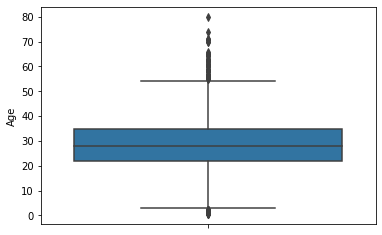

In [16]:
# We can use 'Box Plots' to find outliers in the columns
sns.boxplot(y=data.Age)

In [17]:
# The outliers present can be removed using Percentiles
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')
IQR = Q3-Q1
lowlmt = Q1 - (1.5*IQR)
uplmt = Q3 + (1.5*IQR)

outlier = []
for x in data['Age']:
    if (x > uplmt) or (x < lowlmt):
        outlier.append(x)
data['Age']=np.where(data['Age']>uplmt,uplmt,np.where(data['Age']<lowlmt,lowlmt,data['Age']))        

<AxesSubplot:ylabel='Age'>

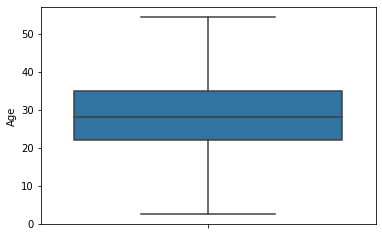

In [18]:
sns.boxplot(y=data.Age)

#### Outliers in 'Fare'

<AxesSubplot:ylabel='Fare'>

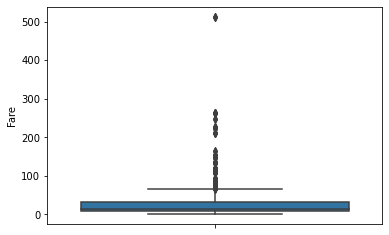

In [19]:
sns.boxplot(y=data.Fare)

In [20]:
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')
IQR = Q3-Q1
lowlmt = Q1 - (1.5*IQR)
uplmt = Q3 + (1.5*IQR)

outlier = []
for x in data['Fare']:
    if (x > uplmt) or (x < lowlmt):
        outlier.append(x)
data['Fare']=np.where(data['Fare']>uplmt,uplmt,np.where(data['Fare']<lowlmt,lowlmt,data['Fare']))

<AxesSubplot:ylabel='Fare'>

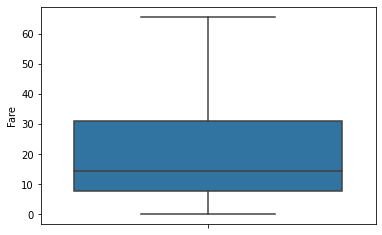

In [21]:
sns.boxplot(y=data.Fare)

#### Outliers in SibSp

<AxesSubplot:ylabel='SibSp'>

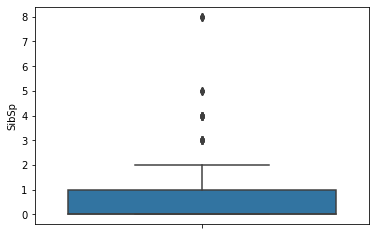

In [22]:
sns.boxplot(y=data.SibSp)

In [23]:
Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation='midpoint')
IQR = Q3-Q1
lowlmt = Q1 - (1.5*IQR)
uplmt = Q3 + (1.5*IQR)

outlier = []
for x in data['SibSp']:
    if (x > uplmt) or (x < lowlmt):
        outlier.append(x)
data['SibSp']=np.where(data['SibSp']>uplmt,uplmt,np.where(data['SibSp']<lowlmt,lowlmt,data['SibSp']))

<AxesSubplot:ylabel='SibSp'>

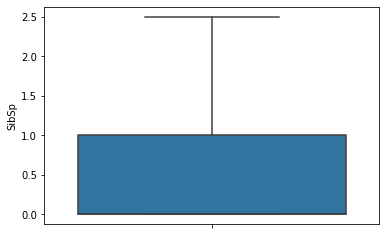

In [24]:
sns.boxplot(y=data.SibSp)